<p><img src="../IMAGES/Logo-UFCG.png" width="80" ></p>

# Introdução à Astrofísica e Cosmologia

## Aula 05: Interiores Estelares

**Luciano Barosi**

## Inicialização

In [1]:
# Incluindo diretório scripts no caminho
from glob import glob
import sys
import os
sys.path.insert(0, '../scripts/')

In [2]:
# show result from all calculations of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Astropy tem muitas funções úteis, aqui iniciamos 
#valores de constantes e a habilidade de fazer manipulações com unidades
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.modeling.models import BlackBody

In [4]:
# pacotes básicos
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import seaborn as sns

In [5]:
#Pacote para algumas manipulações simbólicas.
# Para a visualização das expressões teremos que usar o display
from sympy import *
from sympy import init_printing; 
init_printing(use_latex='mathjax')
from IPython.display import display
from sympy import init_session
init_session()

IPython console for SymPy 1.5.1 (Python 3.7.7-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



In [6]:
# Plot magic
%matplotlib inline

In [7]:
# Instruções para usar o artroquery com a base de dados do ESO
#from astroquery.eso import Eso
#eso = Eso()
#eso.login("lbarosi", store_password=True)
#eso.list_instruments()
#eso.query_instrument('isaac', help=True)
#table = eso.query_instrument('isaac', column_filters={"dp_tech":"SPECTRUM"})
#eso.get_headers(table['DP.ID'])
#data_files = eso.retrieve_data(table['DP.ID'][:2])

## Introdução

Vamos dicutir como as estrelas funcionam e mostrar como os indícios que colhemos das aulas anteriores levam a um modelo satisfatório da dinâmica estelar.

Precisamos formular as equações básicas da dinâmica estelar. Já vimos a primeira delas, a equação do equilíbrio hidrodinâmico:

$$\frac{dP}{dr} = -\frac{GM(r)\rho(r)}{r^2}. $$

Esta estrela que estamos considerando é esfericamente simétrica e estática, sem apresentar rotação ou contração.

Nós precisamos de mais duas equações para poder resolver o nosso problema de três variáveis $P(r), \rho(r), M(r)$.

Em muitos casos vamos precisar ter um entendimento grosso modo das condições das estrelas para saber se estamos indo no caminho certo. Algumas aproximações e simplificações vão servir muito para nos manter no trilho certo.

### Pressão no interior da Estrela

Em uma aproximação bruta, vamos considerar:

$$ \frac{\Delta P}{\Delta r} \sim - \frac{G \langle G \rangle}{\langle r \rangle ^2},$$

e aplicar esta expressão para estimar a pressão no centr da estrela. Para tanto consideramos que a pressão no centro é muito maior do que a pressão na fotosfera, vamos aproximar a média da massa por $M/2$, a densidade pela densidade média $\rho = M/V$ e o raio também por $R/2$, de forma que:

$$P_c \sim \frac{3 G M^2}{2 \pi R^4} $$

In [8]:
Pc =( (3 * const.G * const.M_sun**2 /
        (2 * np.pi * const.R_sun**4 ) ).to(u.Pa))

Para o Sol temos: {{ Pc }}

Ser comparamos com a pressão na fotosfera, mil vezes menor do que a pressão da atmosfera terrestre, vemos que a aproximação que fizemos de alta pressão no interior é plenamente aplicável.

### Equação da continuidade.

A segunda equação da dinâmica estelar assegura que a estrela não esta perdendo nem ganhando massa.

$$\frac{dM}{dr} = 4\pi r^2 \rho(r). $$

### Equação de Estado

Falta ainda uma relação entre a Pressão e a densidade na estrela. Esta relação é uma equação de estado. Certamente existem várias condições diferentes em estrelas (ou coisas que já foram estrelas), mas podemos considerar, po ora, a mesma condição que já discutimos na aula passada. Vamos considerar que a estrela possa ser representada por um gás ideal.

Esta é uma aproximação sensata se lembrarmos que os gases parecem mais ideais quanto maior for a sua temperatura. O gás ideal não sofre transformações de fase e não há interação de curto alcance entre os átomos.

$$P(r) = \frac{\rho(r)kT(r)}{\mu m_p} $$


Há pelo menos mais um gás que contribui com a estrela, com equação de estado diferente. O gás de radiação que exerce uma pressão proporcional a $T^4$, contudo a contribuição da pressão de radiação da estrela para a sua estrutura é negligenciável para a grande maioria das estrelas.

A massa molecular média também é uma função de $r$, a medida em que seu valor muda conforme o grau de ionização dos gases que compõe a estrela.

Vamos considerar por hora o caso em que a estrela seja totalmente ionizada em sua totalidade e que a distribuição de composição química seja aproximadamente constante.

Assim podemos fazer a aproximação de que a massa molucular média seja constante em toda a estrela e seja representada por um valor médio. fixo.

Temos agora 3 equações, mas temos 4 variáveis: $T$, $P$, $M$ e $\rho$.

### Temperatura no Centro da Estrela


Vamos mergulhar mais uma vez em uma aproxinação radical, desta vez para estimarmos a temperatura no centro da estrela e obtermos um valor numérico para o Sol.

\begin{eqnarray}
\frac{dP}{dr} &=& -\frac{GM(r)\rho(r)}{r^2}\\
\frac{dM}{dr} &=& 4\pi r^2 \rho(r)\\
P(r) &=& \frac{\rho(r)kT(r)}{\mu m_p}\\
\end{eqnarray}

Usando o valores que já encontramos para a pressão do Sol, temos que 

$$T_c \sim P_c \frac{\mu_\odot m_p}{\rho_\odot k} \sim \frac{2 G M_\odot \mu_\odot m_p}{R_\odot k}, $$

usando que $\mu_odot = 0.60$ temos:


In [9]:
Tc = (2 * const.G * const.M_sun * 0.6 * const.m_p/\
(const.R_sun * const.k_B)).to(u.K)
print("Temperatura no centro do Sol: {:+0.0e}".format(Tc))

Temperatura no centro do Sol: +3e+07 K


Essa temperatura é apenas 2 vezes maior do que os melhores modelos disponíveis!

### Equação de Transporte de Energia

Estrelas brilham por que são quentes, e suas superfícies são quentes porque o calor flui de seus centros para suas superfícies. Vamos agora discutir como descrever este fluxo de calor.

Calor pode ser transportado por condução, convecção e irradiação. A condução só é eficiente em meios sólidos. (É por isso que a areia da praia queima o seu pé e o ar da praia não queima seu corpo.)

A convecção tem um papel importante nas estrelas, mas não é o fenômeno principal. Vamos começar discutindo a irradiação.

Para um gás de radiação, o potencial químico é zero. (Os fótons tem massa nula) e a função distribuição adequada é a distribuição de planck:

\begin{eqnarray}
f(p) &=& \frac{1}{e^\frac{E}{kT}-1} \\
n(T) &=& \frac{1}{(2\pi)^3}\int d³p f(p) \\
\rho(T) &=& \frac{1}{(2\pi)^3}\int d³p E(p) f(p)\\
P(T) &=& \frac{1}{(2\pi)^3}\int d³p \frac{p^2}{3 E}f(p)
\end{eqnarray}

Podemos mostrar que: 
$$P_\mathrm{rad} = \frac{4\sigma}{c} T^4. $$

Podemos também demonstrar esta expressão diretamente da termodinâmica, a partir da expressão para a energia da radiação.

Vamos considerar uma camada esférica circular fina de espessura $dr$, com raio $r$. Temos que $dT$ deve ser negativo para indicar um fluxo de calor para fora do centro. Podemos então escrever que a força de radiação é dada pelo gradiente de pressão:



$$F_\mathrm{rad} = [P_\mathrm{rad}(r) - P_\mathrm{rad}(r+dr)] 4 \pi r^2 = -\frac{64\pi \sigma}{3c} r^2 T^3 dT, $$

Mas a força da radiação está associada com a variação de momento. A relação de dispersão de fótons é dada por $E = pc$ logo a variação de momento esta associada com a variação de energia, ou seja, um fluxo de energia, que por sua vez está associada com a Luminosidade.

Temos que levar em conta agora que a estrela não é totalmente transparente e apenas uma fração dos fótons de uma camada abaixo escapam de uma casca esférica. Este conceito esta associado com a **profundidade ótica**:

$$d\tau = -\rho(r)\kappa(r) dr, $$

ou seja, a profundidade ótica diminui a medida que saimos da estrela, depende da densidade e de uma "constante" de proporcionalidade e do tamanho do caminho. Se a profundidade ótica for muito pequena podemos considerar que a probabilidade de um foton ser absorvido enquanto cruza a casca esférica é proporcional a $d\tau$. Assim, a razão de fluxo de momento é dado por $L/c$ e o fluxo total de momento pode ser dado por:

$$F_\mathrm{rad} = \frac{L(r)}{c}d\tau = -\frac{L(r)}{c}\rho(r)\kappa(r)dr, $$

portanto:

$$ \frac{dT}{dr} = -\frac{3\rho(r)\kappa(r)L(r)}{64\pi\sigma T(r)^3 r^2}$$

Com esta equação podemos fazer uma estimativa da luminosidade do Sol.

$$L_\odot \sim \frac{2\pi\sigma T_c^4r_\odot}{3\langle \kappa \rangle \rho_\odot} \sim 3 \times 10^{27} \mathrm{W}\left(\frac{\langle \kappa \rangle}{1 \mathrm{m}^2\mathrm{kg}^1} \right)^{-1}$$

Conhecendo a luminosidade solar $L_\odot = 3.9 \times 10^{26} W$ podemos determinar o valor da da média $\langle \kappa \rangle \approx 8 m^2 kg^ {-1}$.

## Teorema do Virial e Estabilidade

O teorema do Virial fornece uma relação entre as médias temporais  energia potencial e a energia cinética de um sistema conservativo.

No caso de equilíbrio podemos demonstrar com facilidade as relações, começando por integrar a equação do equilíbrio hidrostárico:

\begin{eqnarray}
\frac{dP}{dr} &=& -\frac{GM(r)\rho(r)}{r^2} \Rightarrow  \\
\int_0^R dr\; 4\pi r^3 \frac{dP}{dr} &=& -\int_0^R dr\;4\pi r^3 \frac{G M(r)\rho}{r^2} \Rightarrow \\
-3\int_0^R dr\; 4\pi r^2 P &=& -\int_0^M dM\; \frac{G M(r)}{r} \Rightarrow \\
-3 \int_0^M dM\; \frac{P}{\rho} &=& -\int_0^M dM\; \frac{G M(r)}{r} \Rightarrow \\
-2 K &=& U_g
\end{eqnarray}

Podemos considerar uma variedade de gases com equações de estado politrópicas em vez de considerar apenas um gás ideal. Consideramos uma equação de estado na forma $P = K \rho^\gamma$, e poderemos escrever que:

\begin{eqnarray}
\frac{dP}{P}=\frac{\gamma d\rho}{\rho}  &\wedge& \frac{d\rho}{\rho}=\frac{dV}{V} \Rightarrow \\
d\left(\frac{PV}{\gamma -1}\right) &=& -PdV = dU \Rightarrow \\
P = (\gamma -1) \frac{U}{V},
\end{eqnarray}

aplicando na expressão do Virial temos:

$$-3(\gamma -1)K = U_g. $$

Uma estrela é estável se a energia total $K + U_g$ for maior do que zero $U_T = (4-3\gamma)K$.

Para um gás ideal, $\gamma = 5/3$ e para radiação $\gamma = 4/3$. Uma estrela com $\gamma = 4/3$ esta no limiar da estabilidade. 

### Equilíbrio Térmico

A estrela produz uma determinada quantidade de energia por unidade de tempo por diferentes processos e irradia energia na forma luminosa por meio de sua luminosidade.

Podemos escrever:

$$\frac{dL}{dr} = 4\pi r^2 \epsilon \rho,$$

onde $\epsilon = dE/dT = \epsilon_g + \epsilon_\mathrm{nuc} - \epsilon_\nu$.

O primeiro termo é a energia irradiada e as componentes da densidade de energia correspondem a energia gravitacional, energia nuclear e a energia irradiada na forma de neutrinos.

Usando a equação do equilíbrio térmico e a expressão para a pressão de radiação, podemos escrever a pressão de radiação em termos da pressão do total:

$$\frac{dP_\mathrm{rad}}{dP} = \frac{\kappa L(r)}{4\pi c G M(r)} $$ 

A pressão da estrela é formada pela pressão do gás mais a pressão da radiação, portanto a derivada acima deve ser menor do que 1, o que implica um limite para a luminosidade:

$$ L < L_\mathrm{edd} = \frac{4\pi c G M}{\kappa},$$

conhecida como **lumiosidade de Eddington**.

Se esta luminosidade for excedida, a estrela vai ejetar as suas camadas mais exteriores como vento estelar

Esse limite deve ser válido para L calculado no raio da estrela. Se o limite for violado em alguma camada esférica da estrela, o que ocorre é uma mudança de sinal na dependência da pressão do gás, o que significa que este gás agora massa a ter a sua pressão aumentando a medida em que r aumenta. Isto causa uma estratificação nas camadas da estrela e permite o início de um processo convectido de condução de calor.

O critério de Eddington então é uma das condições necessárias para a existência de processos convectivos nas estrelas. (mas não suficiente).

### Derivando propriedades estelares

Este modelo de estrelas que estamos construindo deve ser capaz de explicar as relações que encontramos no diagrama de Hertzsprung-Russel.

Vamos considerar a relação entre massa e luminosidade. Se considerarmos as equações diferenciais como equações de diferenças vemos que:

\begin{eqnarray}
P \propto \frac{M\rho}{\rho} \wedge P \propto \rho T \Rightarrow P = \propto \frac{M \rho}{R}\propto \rho T \Rightarrow T\propto \frac{M}{R} \\
L \propto \frac{R T^4}{\kappa \rho}\propto \frac{R^4 T^4}{\kappa M} \\
L \propto \frac{M^3}{\kappa}
\end{eqnarray}


## Equações de Lane-Emden

Consideremos uma estrela em equilíbrio com uma equação de estado politrópica. As equações que a descrevem são:

\begin{eqnarray}
P &=& K \rho^\gamma \\
\frac{dP}{dr} &=& -\frac{GM\rho}{r^2} \\
\frac{dM}{dr} &=& 4\pi r^2 \rho(r)\\
\frac{dT}{dr} &=& -\frac{3\rho \kappa L}{64\pi \sigma T^3 r^2} \\
\frac{dL}{dr} &=& 4\pi r^2 \epsilon \rho 
\end{eqnarray}

Combinando a equação de estado com a equação de equilíbrio hidrostático temos:

\begin{eqnarray}
\frac{dP}{dr} &=& -\frac{GM\rho}{r^2} \Rightarrow \\
K \gamma \rho^{\gamma -1} \frac{d\rho}{dr} &=& -\frac{GM\rho}{r^2} \Rightarrow \\
K \gamma \rho^{\gamma -1} \frac{d\rho}{dr} &=& -4 \pi\frac{G}{r^2} \rho \int \rho r^2 dr \Rightarrow \\
K \gamma r^2 \rho^{\gamma -2} \frac{d\rho}{dr} &=& - 4\pi G  \int \rho r^2 dr \Rightarrow \\
\frac{d}{dr} K \left( \gamma \rho^{\gamma -2} \frac{d\rho}{dr} \right) &=& -\frac{G}{r^2} \frac{d}{dr}\left( \int \rho r^2 dr \right) \Rightarrow \\
\frac{d}{dr} \left( \rho^{\gamma -2} \frac{d\rho}{dr}  \right) &=& - r^2 \rho \frac{4\pi G}{K \gamma} \\
\frac{1}{\rho r^2} \frac{d}{dr} \left( \rho^{\gamma -2} \frac{d\rho}{dr}  \right) &=& - \frac{4\pi G}{K \gamma} \\
\end{eqnarray}

Esta equação pode ser resolvida a uma forma conhecida como equação de Lane-Emdem.

Fazemos $\gamma = 1+\frac{1}{n}$, consideramos como condições de contorno a partir do centro:

$$ \rho(0) = \rho_c \wedge \left(\frac{d\rho}{dr}\right)_{r=0}=0,$$

agora fazemos uma mudança de variáveis para grandezas adimensionais:

\begin{eqnarray}
\rho &=& \rho_c w^n \\
r = \alpha z &\;\;\;\;\;\;& \alpha = \left(\frac{n+1}{4\pi G} K \rho_c^{1/n -1} \right)^{1/2}
\end{eqnarray}

de forma que a equação final é dada por 
$$\frac{1}{z^2} \frac{d}{dz}\left(z^2 \frac{dw}{dz} \right) + w^n = 0, $$

nestas variáveis as condições de contorno so: $w = 1, \;\;\; dw/dz = 0$ em $z=0$

A equação de Lane-Emden não tem solução analítica, mas pode ser resolvida por métodos numéricos. A equação é stiff na origem, então temos que mover um pouco a solução para fora do ponto $r = 0$. A solução que vamos implementar é no Mathematica e usa a função ```NDSolve```. Abaixo os gráficos para $n \in \{0, 1, 2, 3, 4, 5\}$.

At `1` == `2`, step size is effectively zero; singularity or stiff system suspected.: At x$14258 == 12.4311, step size is effectively zero; singularity or stiff system suspected.

-Graphics-
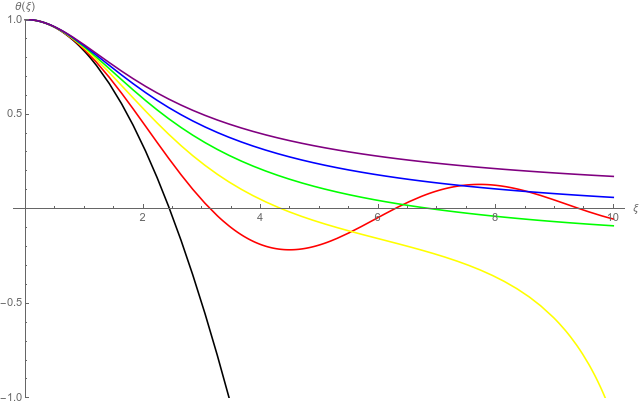

In [31]:
LaneEmdenSolution[n_] := Module[{x, y, eps = $MachineEpsilon},
  NDSolve[{x y[x]^n + 2 y'[x] + x y''[x] == 0, y[eps] == 1, 
     y'[eps] == 0}, y, {x, eps, 25}][[1, 1, 2]]
  ]
soln = LaneEmdenSolution[#][x] & /@ Range[0, 5];
Plot[soln, {x, 0, 10}, Method -> Evaluated -> True, 
 PlotStyle -> {Black, Red, Yellow, Green, Blue, Purple}, 
 PlotRange -> {-1, 1}, AxesLabel -> {\[Xi], \[Theta][\[Xi]]}, ImageSize -> 640]

Evidentemente as soluções só tem a parte positiva física, $w$ esta relacionado com a densidade. Assim cada valor de $n$ apresenta um raio máximo da estrela, que também pode ser determinado numericamente.

{{x -> 2.44949}, {x -> 3.14159}, {x -> 4.35287}, {x -> 6.89685}, {x -> 14.9715}}
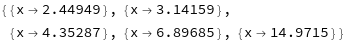

In [35]:
rmax = FindRoot[soln[[#]]==0, {x, 2}] & /@ Range[1, 5]